In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


# 유틸

In [2]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

from keras.models import model_from_json
from typing import Optional

In [3]:
def load_model(
    model_name: str, with_weights_path: Optional[str] = None
) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [4]:
import os
base_gdrive_path = os.path.join("drive", "MyDrive", "deep learning example")

In [5]:
result_path = os.path.join(base_gdrive_path, "results")

# CNN Classification

## Fashion MNIST

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0               


train_labels[:20]

4423680/4422102 [==============================] - 0s 0us/step


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

## 모델

### 모델 생성

In [7]:
def cnn_classification_model():
  input = keras.layers.Input((28, 28, 1))

  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(input)
  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(conv_1)
  pool_1 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_1)

  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(pool_1)
  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(conv_3)
  pool_2 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_3)

  flatten = keras.layers.Flatten()(pool_2)
  dense_1 = keras.layers.Dense(120)(flatten)
  dense_2 = keras.layers.Dense(84)(dense_1)
  dense_3 = keras.layers.Dense(10, activation='softmax')(dense_2)

  return keras.models.Model(inputs=[input], outputs=[dense_3])

In [8]:
model = cnn_classification_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         330       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        880       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0     

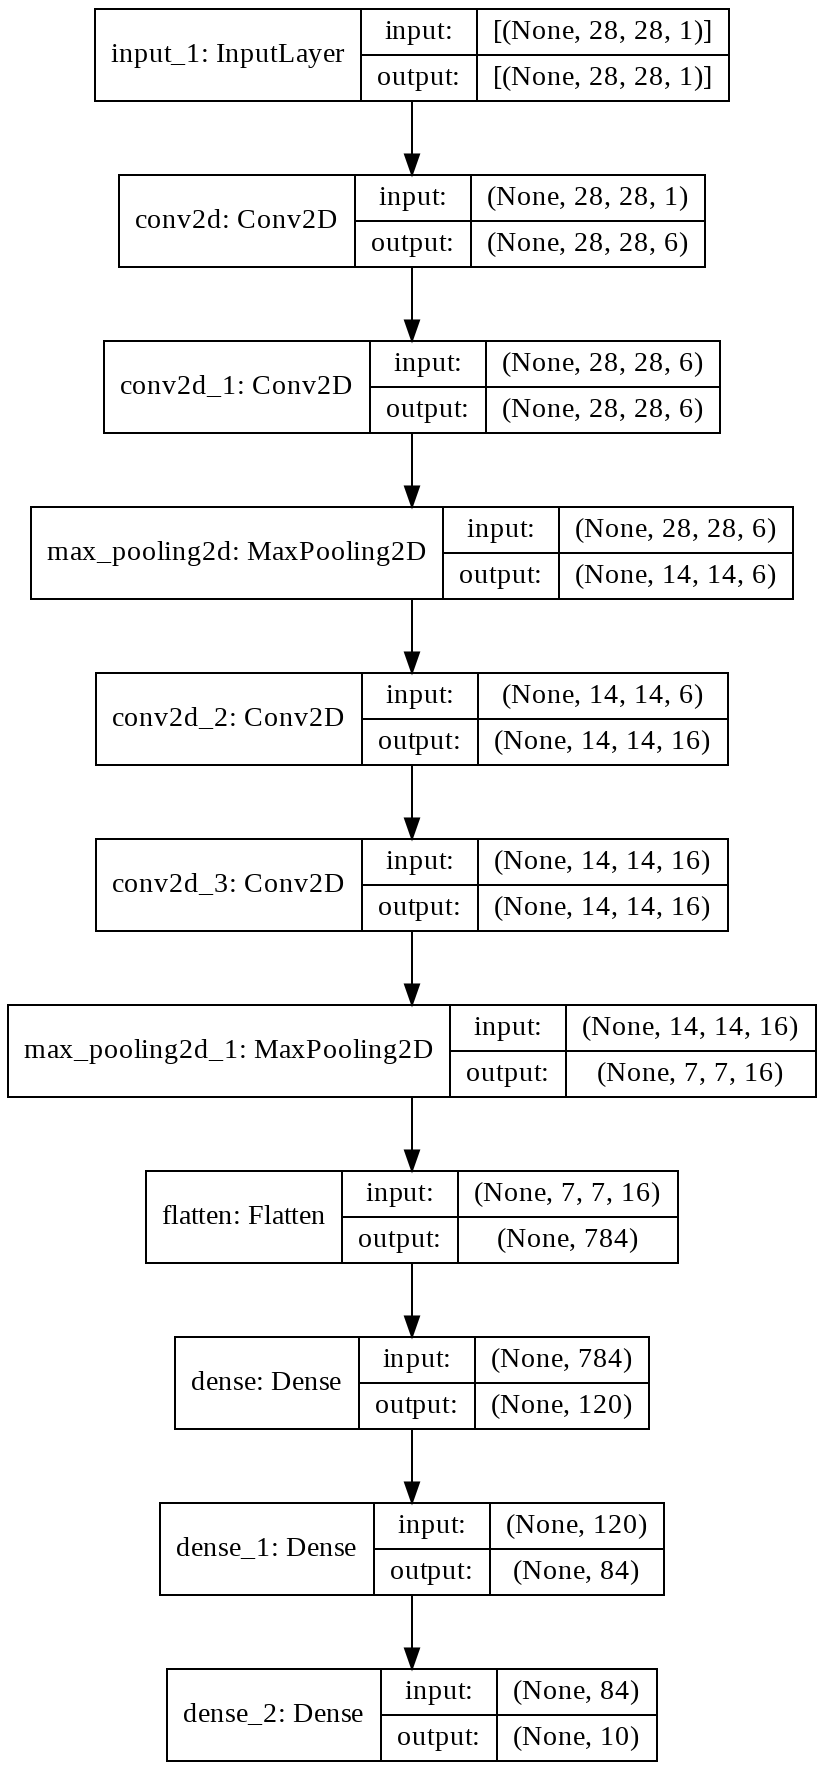

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png', expand_nested=True, dpi=144)

### 모델 트레이닝

In [10]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
BATCH_SIZE = 32
num_train_examples = len(train_images)

import math

history = model.fit(train_images, train_labels, epochs=10, batch_size=BATCH_SIZE, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 37s 3ms/step - loss: 0.4357 - accuracy: 0.8436
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3086 - accuracy: 0.8895
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2757 - accuracy: 0.9003
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2550 - accuracy: 0.9063
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2401 - accuracy: 0.9117
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2266 - accuracy: 0.9176
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2177 - accuracy: 0.9201
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2116 - accuracy: 0.9229
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2053 - accuracy: 0.9247
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.20

[0.843583345413208,
 0.889549970626831,
 0.9003333449363708,
 0.9063000082969666,
 0.9117000102996826,
 0.9175500273704529,
 0.9200666546821594,
 0.9229333400726318,
 0.9246500134468079,
 0.9266833066940308]

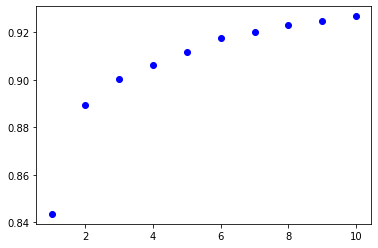

In [12]:
history_accuracy = history.history["accuracy"]

epochs = range(1, len(history_accuracy) + 1)
plt.plot(epochs, history_accuracy, "bo", label="Training accuracy")
history_accuracy

[0.4357392489910126,
 0.30855709314346313,
 0.27567991614341736,
 0.25498485565185547,
 0.24005620181560516,
 0.22662268579006195,
 0.21768084168434143,
 0.21160398423671722,
 0.20530343055725098,
 0.2002665400505066]

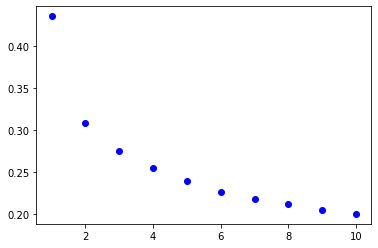

In [13]:
history_loss = history.history["loss"]

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, "bo", label="Training loss")
history_loss

### 모델 테스트 및 예측

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.2678 - accuracy: 0.9085
테스트 정확도: 0.9085000157356262


In [15]:
save_model(os.path.join(result_path, "cnn_classification_model_000.json"), model)

import time
# run_id: str = time.strftime("%Y%m%d-%H%M%S")

run_id: str = "002"
weight_file_name: str = "cnn_classification_model_000__{}.hdf5".format(run_id)

model.save_weights(os.path.join(result_path, weight_file_name))

In [16]:
# run_id: str = "002"
# weight_file_name: str = "cnn_classification_model_000__{}.hdf5".format(run_id))

json_model_path = os.path.join(result_path, "cnn_classification_model_000.json")
model_weight_path = os.path.join(result_path, weight_file_name)
loaded_model2_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model2_with_weight = loaded_model2_with_weight.predict(test_images)

print("예측: {}".format(np.argmax(prediction_loaded_model2_with_weight[0])))
print(prediction_loaded_model2_with_weight[0])
print("정답 :{}".format(test_labels[0]))

예측: 9
[4.3705570e-10 1.0873809e-09 5.9853934e-11 3.6030279e-11 9.8357739e-11
 2.3089235e-06 6.4886896e-10 9.8311668e-04 8.5982734e-08 9.9901438e-01]
정답 :9
